In [1]:
import json
import pandas as pd
import pandas as pd

# Caricamento dei dataset
df_auto = pd.read_csv("auto.csv")
df_cards = pd.read_csv("onepiece_cards.csv")


# Visualizza numero elementi e colonne
print("🛻 AUTO:")
print(f"- {len(df_auto)} elementi")
print(f"- Colonne: {list(df_auto.columns)}\n")

print("🃏 CARTE ONE PIECE:")
print(f"- {len(df_cards)} elementi")
print(f"- Colonne: {list(df_cards.columns)}\n")


🛻 AUTO:
- 8128 elementi
- Colonne: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

🃏 CARTE ONE PIECE:
- 462 elementi
- Colonne: ['Unnamed: 0', 'Card Name', 'Card Type', 'Rarity', 'Color', 'Cost/Life', 'Power', 'Counter', 'Type', 'Attribute', 'Effect', 'Set', 'Card ID']



In [10]:
df_cards_clean = df_cards[[
    'Card Name', 'Card Type', 'Rarity', 'Color', 'Set'
]].copy()
# Rinomina colonne per coerenza
df_cards_clean.rename(columns={
    'Card Name': 'nome',
    'Card Type': 'tipo',
    'Rarity': 'rarità',
    'Color': 'colore',
    'Set': 'Set'
}, inplace=True)

In [6]:
df_auto_clean = df_auto[[
    'name', 'year', 'selling_price', 'km_driven', 'engine', 'max_power'
]].copy()
# Rinomina colonne per coerenza
df_auto_clean.rename(columns={
    'name': 'nome',
    'year': 'anno',
    'selling_price': 'prezzo',
    'km_driven': 'km',
    'engine': 'motore',
    'max_power': 'potenza'
}, inplace=True)

In [8]:
# Aggiungi colonna categoria
df_auto_clean["categoria"] = "auto"

In [9]:
# Aggiungi colonna categoria
df_cards_clean["categoria"] = "carta_onepiece"

In [11]:
df_auto_clean

,nome,anno,prezzo,km,motore,potenza,categoria
0,Maruti Swift Dzire VDI,2014,450000,145500,1248 CC,74 bhp,auto
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1498 CC,103.52 bhp,auto
2,Honda City 2017-2020 EXi,2006,158000,140000,1497 CC,78 bhp,auto
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1396 CC,90 bhp,auto
4,Maruti Swift VXI BSIII,2007,130000,120000,1298 CC,88.2 bhp,auto
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1197 CC,82.85 bhp,auto
8124,Hyundai Verna CRDi SX,2007,135000,119000,1493 CC,110 bhp,auto
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1248 CC,73.9 bhp,auto
8126,Tata Indigo CR4,2013,290000,25000,1396 CC,70 bhp,auto


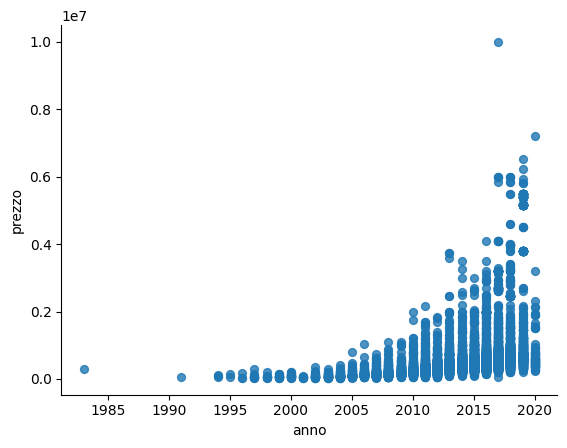

In [13]:
# @title anno vs prezzo

from matplotlib import pyplot as plt
df_auto_clean.plot(kind='scatter', x='anno', y='prezzo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# 4️⃣ Unione logica in un unico contenitore, mantenendo struttura distinta
df_auto_clean["sorgente"] = "df_auto"
df_cards_clean["sorgente"] = "df_cards"

# 5️⃣ Unisci in un unico dataframe con struttura separata
df_unificato = pd.concat([df_auto_clean, df_cards_clean], axis=0, ignore_index=True, sort=False)

In [14]:
df_unificato

,nome,anno,prezzo,km,motore,potenza,categoria,sorgente,tipo,rarità,colore,Set
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,1248 CC,74 bhp,auto,df_auto,NaN,NaN,NaN,NaN
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,1498 CC,103.52 bhp,auto,df_auto,NaN,NaN,NaN,NaN
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,1497 CC,78 bhp,auto,df_auto,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,1396 CC,90 bhp,auto,df_auto,NaN,NaN,NaN,NaN
4,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,1298 CC,88.2 bhp,auto,df_auto,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8585,T-Bone,NaN,NaN,NaN,NaN,NaN,NaN,df_cards,Character,C,Black,-The Navy- [ST-06]
8586,Shockwave,NaN,NaN,NaN,NaN,NaN,NaN,df_cards,Event,C,Black,-The Navy- [ST-06]
8587,Great Eruption,NaN,NaN,NaN,NaN,NaN,NaN,df_cards,Event,C,Black,-The Navy- [ST-06]
8588,White Out,NaN,NaN,NaN,NaN,NaN,NaN,df_cards,Event,C,Black,-The Navy- [ST-06]


In [15]:
df_unificato.to_csv("dataset.csv", index=False)